<a href="https://colab.research.google.com/github/Miguelmorassuti/Projeto-final-Big-Data-Analytics/blob/master/Projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

In [4]:
#Extraindo serie historica dos ultimos 10 anos de preços do boi gordo
# Nota: Valor por arroba de 15 kg. Os valores divulgados são livres de Funrural.

boi_gordo_df = pd.read_csv('boi_gordo_dados.csv')
boi_gordo_df['Data'] = pd.to_datetime(boi_gordo_df['Data'], dayfirst=True)

boi_gordo_df.head()

,Data,À vista R$,À vista US$
0,2014-01-02,"114,85","48,03"
1,2014-01-03,"115,01","48,4"
2,2014-01-06,"114,52","48,18"
3,2014-01-07,"114,75","48,32"
4,2014-01-08,"114,77","48,02"


In [5]:
#Extraindo série histórica dos últimos 10 anos de preço do milho
# Nota: Valor por saca de 60 kg, à vista

milho_df = pd.read_csv('milho_dados.csv')
milho_df['Data'] = pd.to_datetime(milho_df['Data'], dayfirst=True)

milho_df.head()

,Data,À vista R$,À vista US$
0,2014-01-02,"26,64","11,14"
1,2014-01-03,27,"11,36"
2,2014-01-06,"27,29","11,48"
3,2014-01-07,"27,49","11,57"
4,2014-01-08,"27,16","11,37"


In [6]:
#Extraindo série histórica dos últimos 10 anos do preço do etanol hidratado
#Nota: valores livres de impostos

etanol_hidratado_df = pd.read_csv('etanol_dados.csv')
etanol_hidratado_df['Data'] = pd.to_datetime(etanol_hidratado_df['Data'], dayfirst=True)

etanol_hidratado_df.head()

,Data,À vista R$,À vista US$
0,2014-01-03,"1,2835","0,5406"
1,2014-01-10,"1,2844","0,5395"
2,2014-01-17,"1,2889","0,5471"
3,2014-01-24,"1,2837","0,5409"
4,2014-01-31,"1,2861","0,5306"


In [7]:
#Extraindo série histórica dos últimos 10 anos de preço do café arábica
# Nota: Valor por saca de 60 kg, à vista


cafe_arabica_df = pd.read_csv('cafe_arabica_dados.csv')
cafe_arabica_df['Data'] = pd.to_datetime(cafe_arabica_df['Data'], dayfirst=True)

cafe_arabica_df.head()

,Data,À vista R$,À vista US$
0,2014-01-02,"281,71","117,82"
1,2014-01-03,"288,81","121,55"
2,2014-01-06,"292,39","123,01"
3,2014-01-07,"291,2","122,61"
4,2014-01-08,"298,69","124,97"


In [8]:
#Extraindo série histórica dos últimos 10 anos de preço da soja
# Nota: Valor por saca de 60 kg, à vista

soja_df = pd.read_csv('soja_dados.csv')
soja_df['Data'] = pd.to_datetime(soja_df['Data'], dayfirst=True)

soja_df.head()

,Data,À vista R$,À vista US$
0,2014-01-02,"77,25","32,31"
1,2014-01-03,"77,25","32,51"
2,2014-01-06,"77,25","32,5"
3,2014-01-07,"77,25","32,53"
4,2014-01-08,"77,25","32,32"


In [9]:
# Extraindo variação do dolar mensal 01/2014 - 09/2024
dolar_df = pd.read_csv('variacao_dolar_mensal.csv')

dolar_df['Data'] = pd.to_datetime(dolar_df['Data'], dayfirst=True)

dolar_df.head()


,Data,À vista R$
0,2014-01-01,"2,38"
1,2014-02-01,"2,38"
2,2014-03-01,"2,33"
3,2014-04-01,"2,23"
4,2014-05-01,"2,22"


In [10]:
#Dados das 10 maiores empresas do setor agro em valor listadas na B3

jbs = yf.download('JBSS3.SA', start='2014-01-01', end='2024-01-01')
raizen = yf.download('RAIZ4.SA', start='2014-01-01', end='2024-01-01')
martinho = yf.download('SMTO3.SA', start='2014-01-01', end='2024-01-01')
oderich = yf.download('ODER4.SA', start='2014-01-01', end='2024-01-01')
slce = yf.download('SLCE3.SA', start='2014-01-01', end='2024-01-01')
mdias = yf.download('MDIA3.SA', start='2014-01-01', end='2024-01-01')
brf = yf.download('BRFS3.SA', start='2014-01-01', end='2024-01-01')
tentos = yf.download('TTEN3.SA', start='2014-01-01', end='2024-01-01')
minerva = yf.download('BEEF3.SA', start='2014-01-01', end='2024-01-01')
mafrig = yf.download('MRFG3.SA', start='2014-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
## Leitura do arquivo CSV
desempenho_agro = pd.read_csv('desempenho-agro-br.csv')

# Limpando e convertendo a coluna 'Ano' para datetime diretamente
desempenho_agro['Ano'] = pd.to_datetime(desempenho_agro['Ano'].astype(str).str.extract(r'(\d{4})')[0], format='%Y', errors='coerce')

desempenho_agro.head()

,Ano,Participação do Agronegócio no PIB,Valor do PIB do agronegócio em R$,Variação anual do PIB do agro
0,2014-01-01,"18,6%",1.980.452,"0,03"
1,2015-01-01,"20,0%",2.048.486,"3,44"
2,2016-01-01,"22,0%",2.187.709,"6,80"
3,2017-01-01,"20,5%",2.066.930,"-5,52"
4,2018-01-01,"20,0%",2.049.055,"-0,86"


In [12]:
def detect_outliers_iqr(df, column):
  df[column] = pd.to_numeric(df[column].str.replace(r'[^\d,.-]', '', regex=True).str.replace(',', '.', regex=False), errors='coerce')

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
  return outliers

# Lista de DataFrames com as commodities
dfs = [boi_gordo_df, milho_df, etanol_hidratado_df, cafe_arabica_df, soja_df]
commodity_names = ['boi_gordo', 'milho', 'etanol_hidratado', 'cafe_arabica', 'soja']

for i, df in enumerate(dfs):
  column_name = df.columns[1]
  outliers = detect_outliers_iqr(df, column_name)
  print(f"Outliers identificados para {commodity_names[i]} :")
  if outliers.empty:
    print("Não foram identificados outliers.")
  else:
    print(df.loc[outliers])

Outliers identificados para boi_gordo :
Não foram identificados outliers.
Outliers identificados para milho :
Não foram identificados outliers.
Outliers identificados para etanol_hidratado :
          Data  À vista R$ À vista US$
408 2021-10-29      3.8280      0,6846
409 2021-11-05      3.8918      0,6952
410 2021-11-12      3.8099      0,6957
411 2021-11-19      3.6563      0,6591
432 2022-04-14      3.8366       0,819
433 2022-04-22      3.8401      0,8191
Outliers identificados para cafe_arabica :
Não foram identificados outliers.
Outliers identificados para soja :
Não foram identificados outliers.


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalizando os preços para cada dataset
boi_gordo_df['Preco_normalizado'] = scaler.fit_transform(boi_gordo_df[['À vista R$']].replace(',', '.', regex=True).astype(float))
milho_df['Preco_normalizado'] = scaler.fit_transform(milho_df[['À vista R$']].replace(',', '.', regex=True).astype(float))
etanol_hidratado_df['Preco_normalizado'] = scaler.fit_transform(etanol_hidratado_df[['À vista R$']].replace(',', '.', regex=True).astype(float))
soja_df['Preco_normalizado'] = scaler.fit_transform(soja_df[['À vista R$']].replace(',', '.', regex=True).astype(float))
cafe_arabica_df['Preco_normalizado'] = scaler.fit_transform(cafe_arabica_df[['À vista R$']].replace(',', '.', regex=True).astype(float))

# Para o dataset de variação do dólar, também podemos aplicar normalização
dolar_df['Variação_normalizada'] = scaler.fit_transform(dolar_df[['À vista R$']].replace(',', '.', regex=True).astype(float))

In [14]:
# Normalizando os preços das ações das empresas
jbs['Preco_normalizado'] = scaler.fit_transform(jbs[['Adj Close']])
raizen['Preco_normalizado'] = scaler.fit_transform(raizen[['Adj Close']])
martinho['Preco_normalizado'] = scaler.fit_transform(martinho[['Adj Close']])
oderich['Preco_normalizado'] = scaler.fit_transform(oderich[['Adj Close']])
slce['Preco_normalizado'] = scaler.fit_transform(slce[['Adj Close']])
mdias['Preco_normalizado'] = scaler.fit_transform(mdias[['Adj Close']])
brf['Preco_normalizado'] = scaler.fit_transform(brf[['Adj Close']])
tentos['Preco_normalizado'] = scaler.fit_transform(tentos[['Adj Close']])
minerva['Preco_normalizado'] = scaler.fit_transform(minerva[['Adj Close']])
mafrig['Preco_normalizado'] = scaler.fit_transform(mafrig[['Adj Close']])

# Criando um dataframe unificado com os dados das empresas
empresas_agro = pd.DataFrame({
    'Data': jbs.index,  # Assumindo que as datas estão alinhadas
    'JBS': jbs['Preco_normalizado'],
    'Raizen': raizen['Preco_normalizado'],
    'Martinho': martinho['Preco_normalizado'],
    'Oderich': oderich['Preco_normalizado'],
    'SLCE': slce['Preco_normalizado'],
    'Mdias': mdias['Preco_normalizado'],
    'Brf': brf['Preco_normalizado'],
    'Tentos': tentos['Preco_normalizado'],
    'Minerva': minerva['Preco_normalizado'],
    'Mafrig': mafrig['Preco_normalizado']
})

empresas_agro.head()

,Data,JBS,Raizen,Martinho,Oderich,SLCE,Mdias,Brf,Tentos,Minerva,Mafrig
Date,,,,,,,,,,,
2014-01-02 00:00:00+00:00,2014-01-02 00:00:00+00:00,0.051988,NaN,0.017487,NaN,0.030435,0.304761,0.626342,NaN,0.422972,0.009531
2014-01-03 00:00:00+00:00,2014-01-03 00:00:00+00:00,0.046996,NaN,0.022895,NaN,0.030830,0.328369,0.606395,NaN,0.432211,0.013725
2014-01-06 00:00:00+00:00,2014-01-06 00:00:00+00:00,0.050562,NaN,0.021573,NaN,0.031049,0.318082,0.607430,NaN,0.417692,0.017919
2014-01-07 00:00:00+00:00,2014-01-07 00:00:00+00:00,0.053891,NaN,0.025779,NaN,0.031049,0.321783,0.611123,NaN,0.420992,0.020969
2014-01-08 00:00:00+00:00,2014-01-08 00:00:00+00:00,0.057219,NaN,0.023796,NaN,0.033241,0.314382,0.587483,NaN,0.419672,0.020207


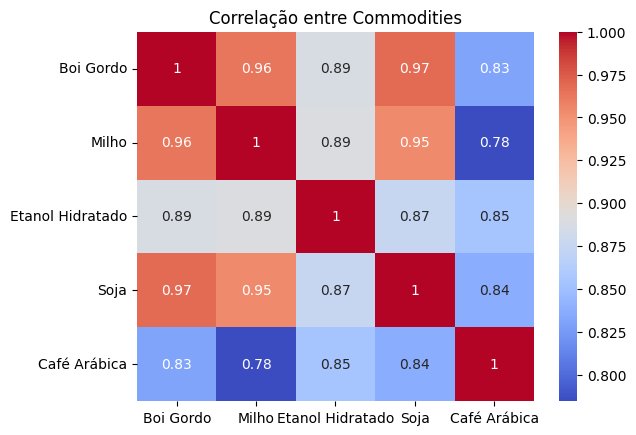

In [15]:
dados_combinados = pd.concat([boi_gordo_df.set_index('Data')['Preco_normalizado'],
                              milho_df.set_index('Data')['Preco_normalizado'],
                              etanol_hidratado_df.set_index('Data')['Preco_normalizado'],
                              soja_df.set_index('Data')['Preco_normalizado'],
                              cafe_arabica_df.set_index('Data')['Preco_normalizado'],
                              ], axis=1)

# Renomeando colunas para facilitar a leitura
dados_combinados.columns = ['Boi Gordo', 'Milho', 'Etanol Hidratado', 'Soja', 'Café Arábica']

# Verificando a correlação entre as variáveis
correlacao = dados_combinados.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title("Correlação entre Commodities")
plt.show()

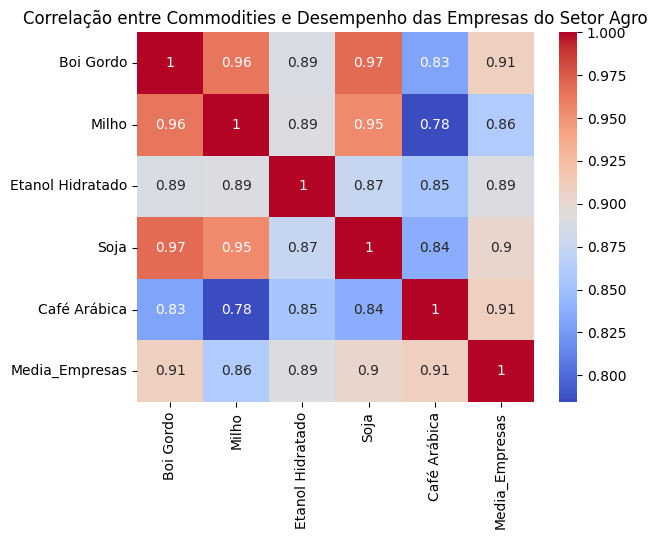

In [16]:
# Calcula a média dos preços das ações das 10 empresas
empresas_agro['Media_Empresas'] = empresas_agro[['JBS', 'Raizen', 'Martinho', 'Oderich', 'SLCE', 'Mdias', 'Brf', 'Tentos', 'Minerva', 'Mafrig']].mean(axis=1)

# Convert 'Data' column to tz-naive DatetimeIndex in all dataframes
boi_gordo_df['Data'] = pd.to_datetime(boi_gordo_df['Data']).dt.tz_localize(None)
milho_df['Data'] = pd.to_datetime(milho_df['Data']).dt.tz_localize(None)
etanol_hidratado_df['Data'] = pd.to_datetime(etanol_hidratado_df['Data']).dt.tz_localize(None)
soja_df['Data'] = pd.to_datetime(soja_df['Data']).dt.tz_localize(None)
cafe_arabica_df['Data'] = pd.to_datetime(cafe_arabica_df['Data']).dt.tz_localize(None)
empresas_agro['Data'] = pd.to_datetime(empresas_agro['Data']).dt.tz_localize(None)


# Concatena a média das empresas com os dados das outras commodities
dados_combinados = pd.concat([boi_gordo_df.set_index('Data')['Preco_normalizado'],
                              milho_df.set_index('Data')['Preco_normalizado'],
                              etanol_hidratado_df.set_index('Data')['Preco_normalizado'],
                              soja_df.set_index('Data')['Preco_normalizado'],
                              cafe_arabica_df.set_index('Data')['Preco_normalizado'],
                              empresas_agro.set_index('Data')['Media_Empresas']], axis=1)


# Renomeia as colunas
dados_combinados.columns = ['Boi Gordo', 'Milho', 'Etanol Hidratado', 'Soja', 'Café Arábica', 'Media_Empresas']

# Verifica a correlação entre as variáveis
correlacao = dados_combinados.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title("Correlação entre Commodities e Desempenho das Empresas do Setor Agro")
plt.show()

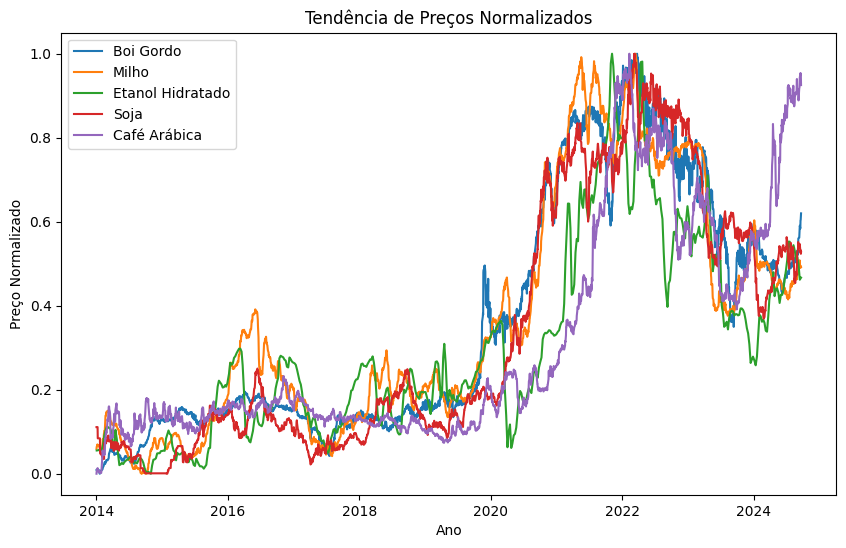

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(boi_gordo_df['Data'], boi_gordo_df['Preco_normalizado'], label='Boi Gordo')
plt.plot(milho_df['Data'], milho_df['Preco_normalizado'], label='Milho')
plt.plot(etanol_hidratado_df['Data'], etanol_hidratado_df['Preco_normalizado'], label='Etanol Hidratado')
plt.plot(soja_df['Data'], soja_df['Preco_normalizado'], label='Soja')
plt.plot(cafe_arabica_df['Data'], cafe_arabica_df['Preco_normalizado'], label='Café Arábica')
plt.legend()
plt.title('Tendência de Preços Normalizados')
plt.xlabel('Ano')
plt.ylabel('Preço Normalizado')
plt.show()

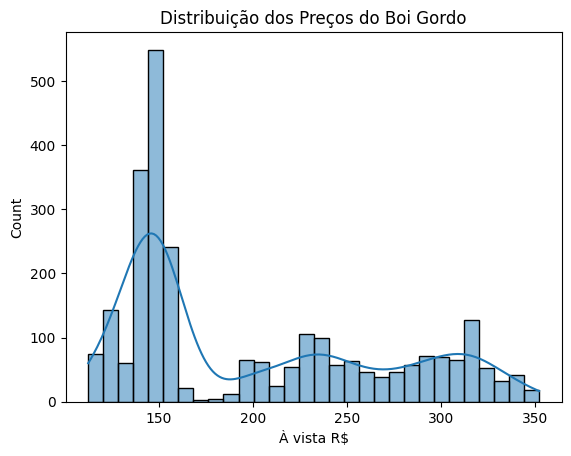

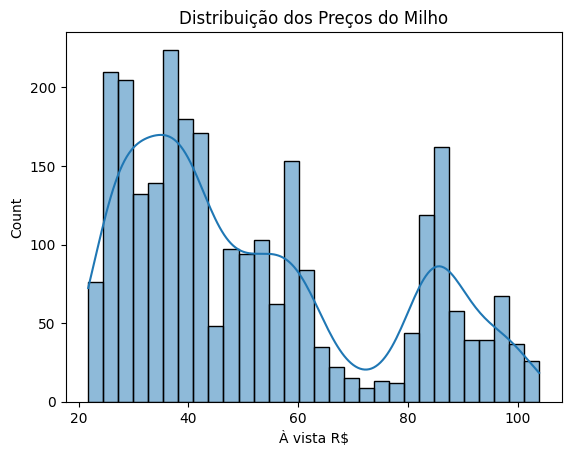

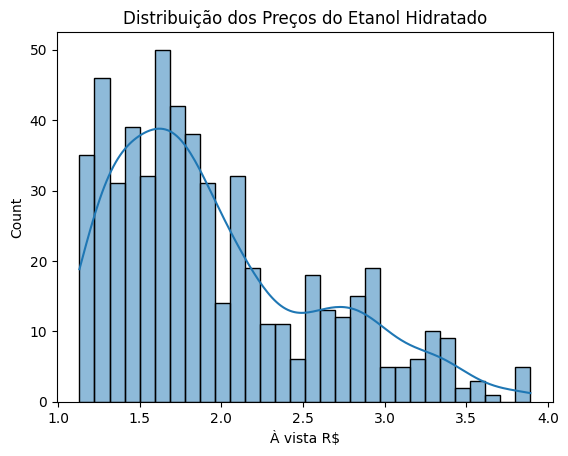

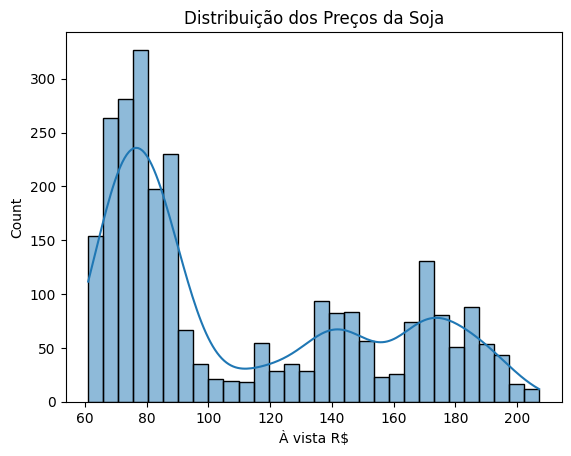

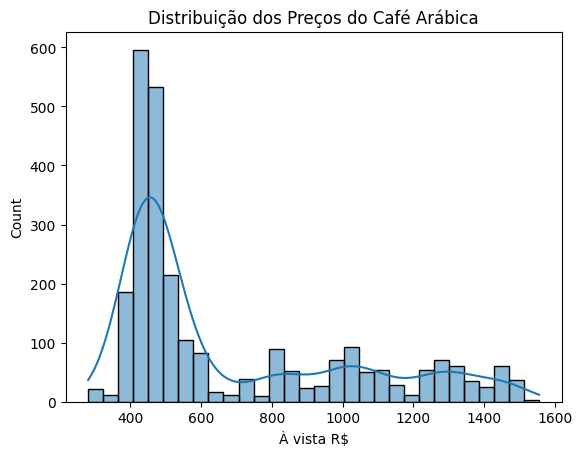

In [18]:
sns.histplot(boi_gordo_df['À vista R$'], kde=True, bins=30)
plt.title("Distribuição dos Preços do Boi Gordo")
plt.show()

sns.histplot(milho_df['À vista R$'], kde=True, bins=30)
plt.title("Distribuição dos Preços do Milho")
plt.show()

sns.histplot(etanol_hidratado_df['À vista R$'], kde=True, bins=30)
plt.title("Distribuição dos Preços do Etanol Hidratado")
plt.show()

sns.histplot(soja_df['À vista R$'], kde=True, bins=30)
plt.title("Distribuição dos Preços da Soja")
plt.show()

sns.histplot(cafe_arabica_df['À vista R$'], kde=True, bins=30)
plt.title("Distribuição dos Preços do Café Arábica")
plt.show()

In [19]:
start_date = '2014-01-01'
end_date = '2024-12-31'
dados_combinados = dados_combinados.loc[start_date:end_date]

In [20]:
dados_combinados.fillna(method='ffill', inplace=True)


<ipython-input-20-14f47ab44330>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_combinados.fillna(method='ffill', inplace=True)


In [21]:
# Matriz de correlação
correlacao = dados_combinados[['Boi Gordo', 'Milho', 'Soja', 'Café Arábica', 'Etanol Hidratado', 'Media_Empresas']].corr()

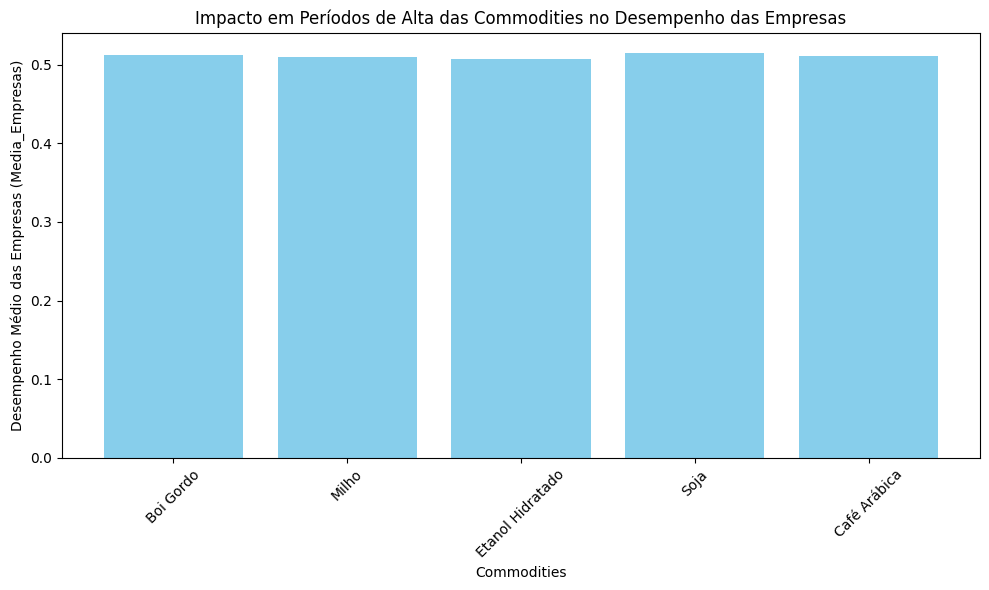

In [22]:
# Identificar períodos de alta (quando o preço está acima do percentil 75%)
def identificar_alta(dataframe, column):
    threshold = dataframe[column].quantile(0.6)  # Percentil 75
    return dataframe[column] > threshold

# Calcular o desempenho médio das empresas em períodos de alta para cada commodity
desempenho_por_commodity = {}
for commodity in ['Boi Gordo', 'Milho', 'Etanol Hidratado', 'Soja', 'Café Arábica']:
    # Identificar períodos de alta
    periodos_alta = identificar_alta(dados_combinados, commodity)

    # Calcular média do desempenho das empresas durante os períodos de alta
    desempenho_medio = dados_combinados.loc[periodos_alta, 'Media_Empresas'].mean()
    desempenho_por_commodity[commodity] = desempenho_medio

# Criar gráfico de barras para mostrar o impacto no desempenho médio
plt.figure(figsize=(10, 6))
plt.bar(desempenho_por_commodity.keys(), desempenho_por_commodity.values(), color='skyblue')
plt.xlabel('Commodities')
plt.ylabel('Desempenho Médio das Empresas (Media_Empresas)')
plt.title('Impacto em Períodos de Alta das Commodities no Desempenho das Empresas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
import plotly.express as px

fig = px.line(
    dados_combinados.reset_index(),
    x='Data',  # Changed from 'index' to 'Data' assuming 'Data' is your date column after reset_index
    y=['Boi Gordo', 'Milho', 'Soja', 'Café Arábica', 'Etanol Hidratado', 'Media_Empresas'],
    title='Preços das Commodities e Desempenho das Empresas (2014-2024)',
    labels={'Data': 'Ano', 'value': 'Preço/Retorno', 'variable': 'Série'} # Changed 'index' to 'Data' for consistency
)
fig.show()

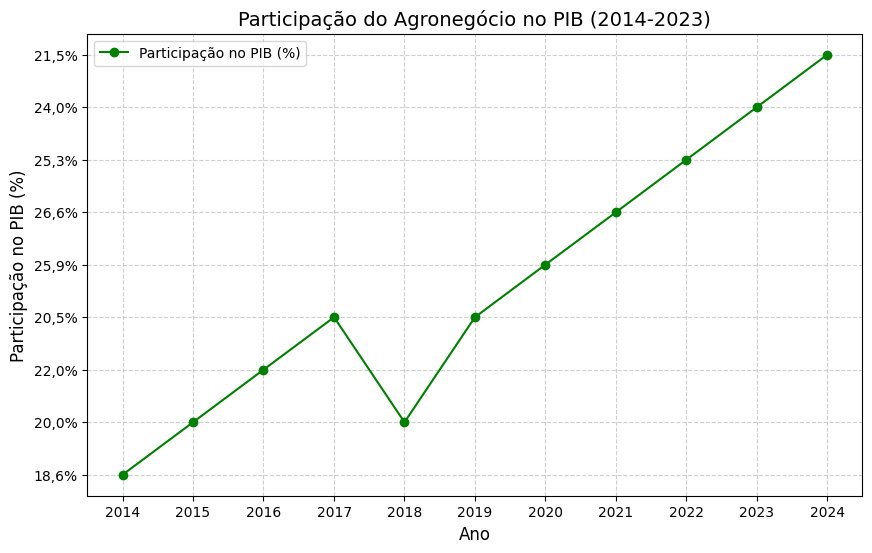

In [24]:
# Gráfico de linha para participação no PIB
plt.figure(figsize=(10, 6))
plt.plot(desempenho_agro['Ano'], desempenho_agro['Participação do Agronegócio no PIB'], marker='o', color='green', label='Participação no PIB (%)')

# Personalização do gráfico
plt.title('Participação do Agronegócio no PIB (2014-2023)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Participação no PIB (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

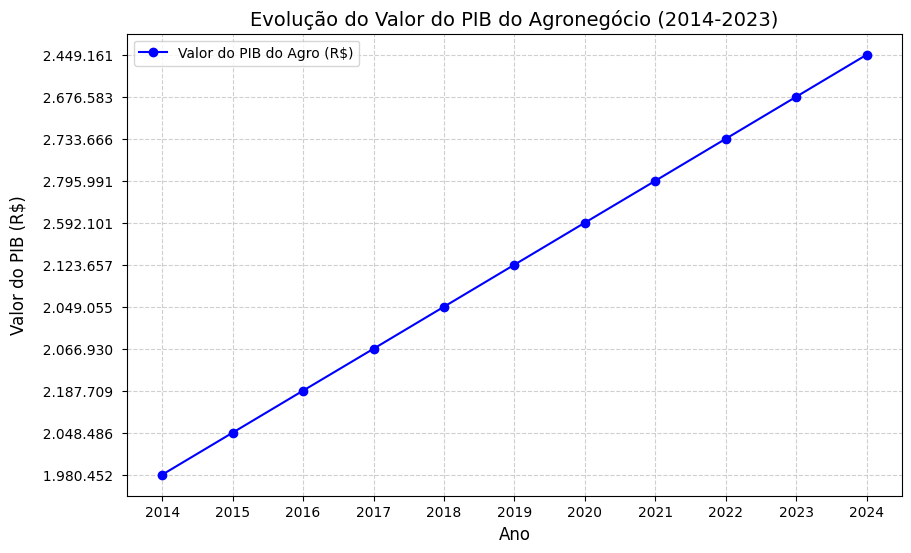

In [25]:
# Gráfico de linha para o valor do PIB do agronegócio
plt.figure(figsize=(10, 6))
plt.plot(desempenho_agro['Ano'], desempenho_agro['Valor do PIB do agronegócio em R$'], marker='o', color='blue', label='Valor do PIB do Agro (R$)')

# Personalização do gráfico
plt.title('Evolução do Valor do PIB do Agronegócio (2014-2023)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor do PIB (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [26]:
# Garantindo que os índices são do tipo datetime
dados_combinados.index = pd.to_datetime(dados_combinados.index)
dolar_df['Data'] = pd.to_datetime(dolar_df['Data'])

# Configurando o índice do dólar e reindexando para datas diárias
dolar_df.set_index('Data', inplace=True)
dolar_diario = dolar_df.reindex(dados_combinados.index).interpolate(method='linear')


<ipython-input-26-25c9f43f865d>:7: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [27]:
dados_combinados['Dolar_Normalizado'] = dolar_diario['Variação_normalizada']

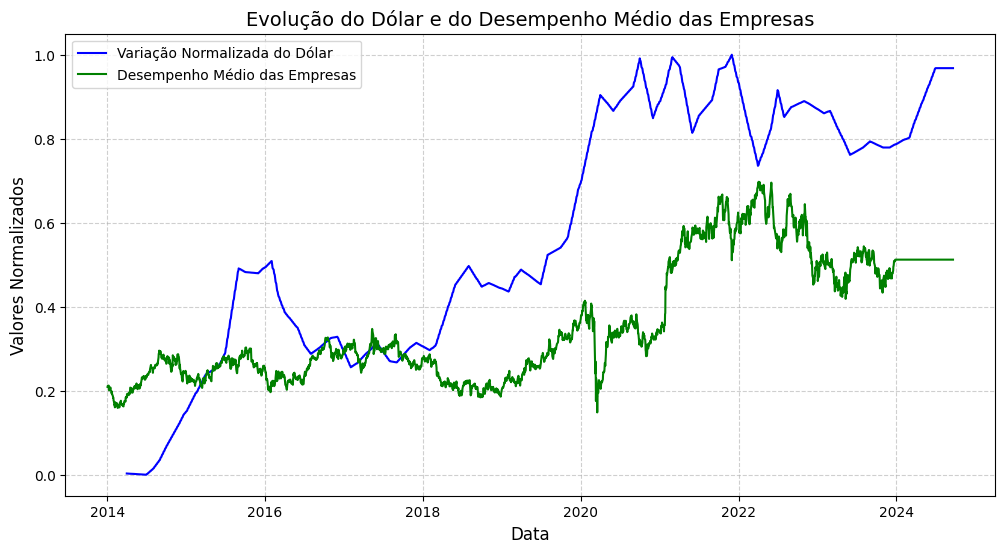

In [28]:
plt.figure(figsize=(12, 6))

# Gráfico para o dólar
plt.plot(dados_combinados.index, dados_combinados['Dolar_Normalizado'], color='blue', label='Variação Normalizada do Dólar')

# Gráfico para o desempenho das empresas
plt.plot(dados_combinados.index, dados_combinados['Media_Empresas'], color='green', label='Desempenho Médio das Empresas')

# Personalização
plt.title('Evolução do Dólar e do Desempenho Médio das Empresas', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valores Normalizados', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()